<a href="https://colab.research.google.com/github/MaCroDmT/python/blob/main/python_final_project_group_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Student-1
Name: PROTTOY SAHA
ID# 21-45640-3
```

```
Student-2
Name: MD. REZUAN HUSSAIN
ID# 21-45389-3
```

```
Student-3
Name: MD MAHADI HASAN EMON
ID# 20-43099-1
```

```
Student-4
Name:
ID#
```



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import all necessary libraries.



In [2]:
# load/import all required library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay



•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution

# start writing your code here
data = pd.read_csv('/content/drive/My Drive/Python-Group-2/bank.csv')

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [4]:
# write task-2 solution

# start writing your code here

df = pd.read_csv('/content/drive/My Drive/Python-Group-2/bank.csv')
print("Missing values before filling:")
print(data.isnull().sum())

original_rows = len(df)
df = df.drop_duplicates()
new_rows = len(df)

print("Duplicate rows dropped.")
print("Remaining rows after dropping duplicates: " + str(new_rows))

mean_fill_cols = ['age', 'balance','day','duration','campaign','pdays','previous']
mode_fill_cols = ['job', 'marital','education','default','housing','loan','contact','month','poutcome','deposit']
for col in mean_fill_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
        print("Filled missing values in '" + col + "' with mean: " + str(df[col].mean()))

for col in mode_fill_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        print("Filled missing values in '" + col + "' with mode: " + str(df[col].mode()[0]))

print("\nRemaining missing values:")
print(df.isnull().sum())
data = df

Missing values before filling:
age           4
job           3
marital       2
education     3
default       5
balance       4
housing       4
loan          1
contact       2
day          11
month         6
duration      3
campaign      2
pdays         2
previous      1
poutcome      4
deposit       4
dtype: int64
Duplicate rows dropped.
Remaining rows after dropping duplicates: 11162
Filled missing values in 'age' with mean: 41.22987990679333
Filled missing values in 'balance' with mean: 1529.0849614626277
Filled missing values in 'day' with mean: 15.656891758586672
Filled missing values in 'duration' with mean: 371.9105654628551
Filled missing values in 'campaign' with mean: 2.5085125448028673
Filled missing values in 'pdays' with mean: 51.339784946236556
Filled missing values in 'previous' with mean: 0.8326314846339934
Filled missing values in 'job' with mode: management
Filled missing values in 'marital' with mode: married
Filled missing values in 'education' with mode: secondary
F

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

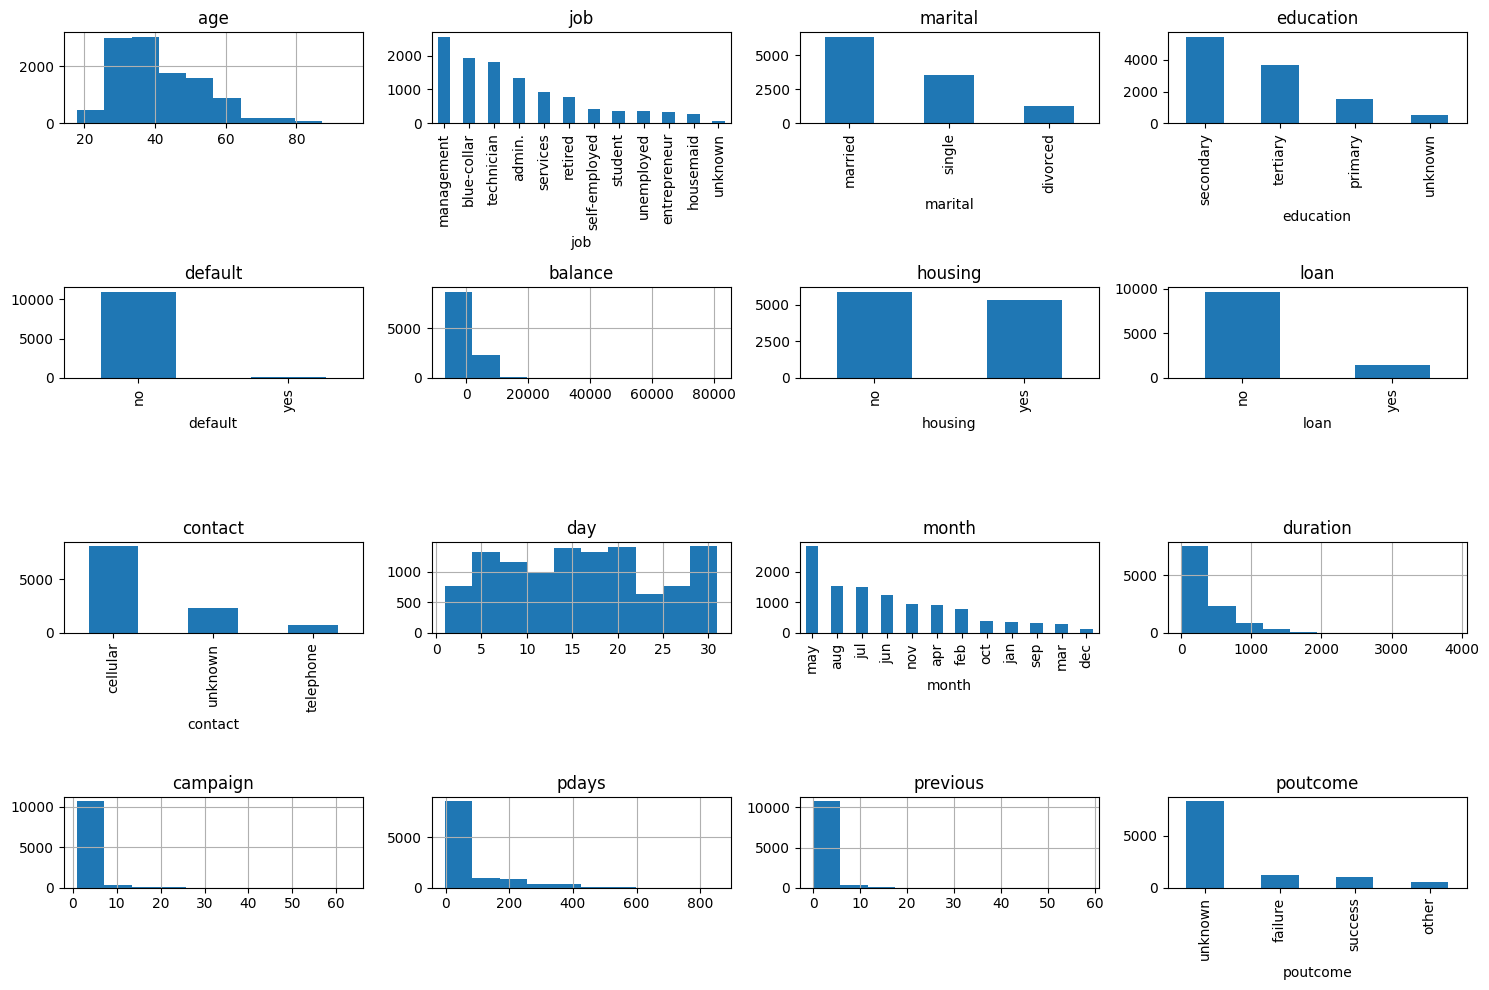

In [5]:
# write task-3 solution

# start writing your code here

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    if column != 'deposit':
        plt.subplot(4, 4, i)
        if data[column].dtype == 'object':
            data[column].value_counts().plot(kind='bar')
        else:
            data[column].hist()
        plt.title(column)
plt.tight_layout()
plt.show()

•	**Task 4:** Perform scaling on the features of the dataset. Remember that you will need to apply data conversion before scaling if required.

In [6]:
# write task-4 solution

# start writing your code here
data['job'] = data['job'].map({'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11, 'unknown': 12})
data['marital'] = data['marital'].map({'divorced': 1, 'married': 2, 'single': 3})
data['education'] = data['education'].map({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 4})
data['default'] = data['default'].map({'no': 0, 'yes': 1})
data['housing'] = data['housing'].map({'no': 0, 'yes': 1})
data['loan'] = data['loan'].map({'no': 0, 'yes': 1})
data['contact'] = data['contact'].map({'cellular': 1, 'telephone': 2, 'unknown': 3})
data['month'] = data['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['poutcome'] = data['poutcome'].map({'failure': 1, 'success': 2, 'other': 3, 'unknown': 4})
data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('deposit', axis=1))

•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use the value 3217 as the value of the random_state parameter of this function.

In [7]:
# write task-5 solution

# start writing your code here

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['deposit'], test_size=0.2, random_state=3217)


•	**Task 6:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [8]:
# write task-6 solution

# start writing your code here

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[836 301]
 [232 864]]


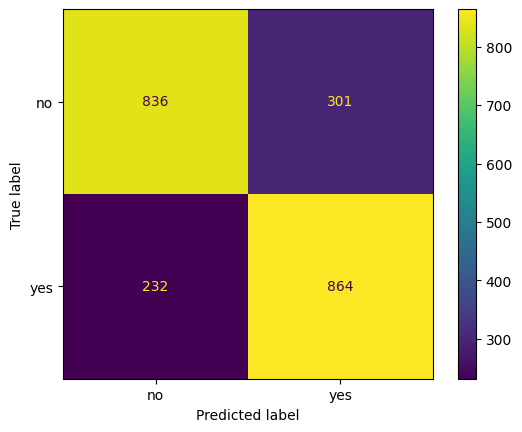

In [9]:
# write task-7 solution

# start writing your code here

y_pred = nb_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.show()

•	**Taks 8:** Calculate your model's train and test accuracy and compare them.

In [10]:
# write task-8 solution

# start writing your code here
train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7470041438010976
Test Accuracy: 0.761307657859382


•	**Taks 9:** Show how 10-fold cross-validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [11]:
# write task-9 solution

# start writing your code here

cv_scores = cross_val_score(nb_classifier, scaled_features, data['deposit'], cv=10)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.51119069 0.71351835 0.67562724 0.7437276  0.73566308 0.8046595
 0.79032258 0.78673835 0.74641577 0.74820789]
Mean CV Accuracy: 0.7256071049245452
